<a href="https://colab.research.google.com/github/oferbaharav/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/Assignment-4/module4-makefeatures/Assignment_4_and_New_Ryan_Allred_to_Alex_class_and_notes_Copy_of_LS_DSPT3_114_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 




# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

In [0]:
import pandas as pd
df = pd.DataFrame({'animal': ['cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog'],
                   'country': ['USA', 'Canada', 'Canada', 'Canada', 'USA', 'Canada', 'USA', 'USA'],
                   'gender': ['male', 'female', 'male', 'male', 'male', 'male', 'female', 'female']})
df.head()

,animal,country,gender
0,cat,USA,male
1,cat,Canada,female
2,dog,Canada,male
3,cat,Canada,male
4,dog,USA,male


In [0]:
pd.crosstab(df['animal'], df['country'])


country,Canada,USA
animal,,
cat,3,1
dog,1,3


In [0]:
pd.crosstab(df['country'], df['gender'], normalize='columns')

gender,female,male
country,,
Canada,0.333333,0.6
USA,0.666667,0.4


In [0]:
pd.crosstab(df['country'], df['gender'], normalize='index')


gender,female,male
country,,
Canada,0.25,0.75
USA,0.50,0.50


In [54]:
pd.crosstab(df['country'], [df['gender'], df['animal']], margins=True)

gender  female     male     All
animal     cat dog  cat dog    
country                        
Canada       1   0    2   1   4
USA          0   2    1   1   4
All          1   2    3   2   8

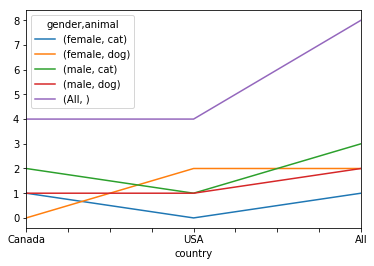

In [56]:
crosstab = pd.crosstab(df['country'], [df['gender'], df['animal']], margins=True)
crosstab.plot()

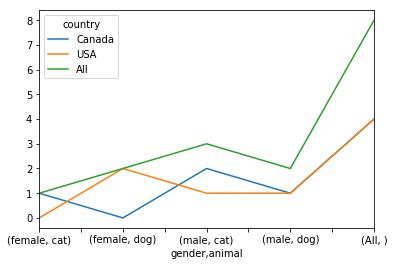

In [57]:
crosstab1 = pd.crosstab(df['country'], [df['gender'], df['animal']], margins=True).T
crosstab1.plot()

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [58]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-09-13 02:35:49--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [            <=>     ]  21.58M   451KB/s    in 52s     

2019-09-13 02:36:42 (426 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22631049]



In [59]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [61]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [62]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4264.17","4264.17","1891.55","1891.55","1335.83","555.72","0.0","0.0","0.0","Aug-2019","190.21","Sep-2019","Aug-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [75]:
df = pd.read_csv('LoanStats_2018Q4.csv', header =0)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title      emp_length home_ownership annual_inc verification_status issue_d  loan_status        pymnt_plan url desc purpose            title              zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            36 months  10.33%  324.23      B     B1        NaN            < 1 year   MORTGAGE       280000     Not Verified        Dec-2018 Current            n          NaN NaN  debt_consolidation Debt consolidation 974xx    OR         6.15  2           Jan-1996         0              18                     NaN                    14       0       9082      38%        23        w                   8289.30   8289.30       2261.0      2261.00         1710.70         550.30        0.0                0.0        0.0                     Jul-2019     324.23          Sep-2019     Aug-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              671          246828      1           3           2           3           1                  48552        62      1           3           4923       46       23900            2      7           1            7                    17631       11897          43.1    0                        0           158                275                  11                    1              1        11                   NaN                      11                    NaN                            0                     3              4               7           7         10        9             11            4                   14       0                0            0                  4                  91.3           28.6             0       

In [85]:
import pandas as pd
#set Pandas Display Options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = pd.read_csv('LoanStats_2018Q4.csv', header =1)
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128414, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,Jan-1996,0.0,18.0,NaN,14.0,0.0,9082.0,38%,23.0,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,671.0,246828.0,1.0,3.0,2.0,3.0,1.0,48552.0,62.0,1.0,3.0,4923.0,46.0,23900.0,2.0,7.0,1.0,7.0,17631.0,11897.0,43.1,0.0,0.0,158.0,275.0,11.0,1.0,1.0,11.0,NaN,11.0,NaN,0.0,3.0,4.0,7.0,7.0,10.0,9.0,11.0,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0.0,Sep-2006,4.0,59.0,NaN,15.0,0.0,5199.0,19.2%,20.0,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,66926.0,5.0,4.0,3.0,4.0,5.0,61727.0,86.0,6.0,11.0,1353.0,68.0,27100.0,4.0,0.0,4.0,15.0,4462.0,20174.0,7.9,0.0,0.0,147.0,118.0,2.0,2.0,0.0,2.0,NaN,0.0,NaN,0.0,5.0,7.0,9.0,9.0,8.0,11.0,12.0,7.0,15.0,0.0,0.0,0.0,9.0,95.0,0.0,0.0,0.0,98655.0,66926.0,21900.0,71555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,debt_consolidation,Debt

In [0]:
df['term'].str.strip('months')


In [108]:
#Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

searchfor = ["Current", "Fully Paid"]

df["loan_status_is_great"] = df["loan_status"].str.contains("|".join(searchfor)).astype

df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_is_great
0,NaN,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,Jan-1996,0.0,18.0,NaN,14.0,0.0,9082.0,38%,23.0,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,671.0,246828.0,1.0,3.0,2.0,3.0,1.0,48552.0,62.0,1.0,3.0,4923.0,46.0,23900.0,2.0,7.0,1.0,7.0,17631.0,11897.0,43.1,0.0,0.0,158.0,275.0,11.0,1.0,1.0,11.0,NaN,11.0,NaN,0.0,3.0,4.0,7.0,7.0,10.0,9.0,11.0,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,<bound method NDFrame.astype of 0 Tru...
1,NaN,NaN,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0.0,Sep-2006,4.0,59.0,NaN,15.0,0.0,5199.0,19.2%,20.0,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,66926.0,5.0,4.0,3.0,4.0,5.0,61727.0,86.0,6.0,11.0,1353.0,68.0,27100.0,4.0,0.0,4.0,15.0,4462.0,20174.0,7.9,0.0,0.0,147.0,118.0,2.0,2.0,0.0,2.0,NaN,0.0,NaN,0.0,5.0,7.0,9.0,9.0,8.0,11.0,12.0,7.0,15.0,0.0,0.0,0.0,9.0,95.0,0.0,0.0,0.0,98655.0,66926.0,21900.0,71555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,<bound method NDFrame.astype of 0 Tru...
2,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative

In [119]:
#Make last_pymnt_d_month and last_pymnt_d_year columns.
df["last_pymnt_d"] = pd.to_datetime(df["last_pymnt_d"], infer_datetime_format=True)
df["last_pymnt_d_month"] = df["last_pymnt_d"].dt.month

df["last_pymnt_d_year"] = df["last_pymnt_d"].dt.year

df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_is_great,last_pymnt_d_month,last_pymnt_d_year
0,NaN,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,Jan-1996,0.0,18.0,NaN,14.0,0.0,9082.0,38%,23.0,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,2019-07-01,324.23,Sep-2019,Aug-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,671.0,246828.0,1.0,3.0,2.0,3.0,1.0,48552.0,62.0,1.0,3.0,4923.0,46.0,23900.0,2.0,7.0,1.0,7.0,17631.0,11897.0,43.1,0.0,0.0,158.0,275.0,11.0,1.0,1.0,11.0,NaN,11.0,NaN,0.0,3.0,4.0,7.0,7.0,10.0,9.0,11.0,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,<bound method NDFrame.astype of 0 Tru...,7.0,2019.0
1,NaN,NaN,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0.0,Sep-2006,4.0,59.0,NaN,15.0,0.0,5199.0,19.2%,20.0,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,2019-07-01,155.68,Sep-2019,Aug-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,66926.0,5.0,4.0,3.0,4.0,5.0,61727.0,86.0,6.0,11.0,1353.0,68.0,27100.0,4.0,0.0,4.0,15.0,4462.0,20174.0,7.9,0.0,0.0,147.0,118.0,2.0,2.0,0.0,2.0,NaN,0.0,NaN,0.0,5.0,7.0,9.0,9.0,8.0,11.0,12.0,7.0,15.0,0.0,0.0,0.0,9.0,95.0,0.0,0.0,0.0,98655.0,66926.0,21900.0,71555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,<bound method NDFrame.astype of 0 Tru...,7.0,2019.0
2,NaN,NaN,5

In [84]:
df.isnull().sum().sort_values(ascending = False)

desc                                          128414
member_id                                     128414
url                                           128414
id                                            128412
orig_projected_additional_accrued_interest    128388
hardship_type                                 128387
hardship_last_payment_amount                  128387
hardship_payoff_balance_amount                128387
hardship_reason                               128387
hardship_loan_status                          128387
hardship_dpd                                  128387
hardship_length                               128387
payment_plan_start_date                       128387
hardship_end_date                             128387
hardship_start_date                           128387
hardship_amount                               128387
deferral_term                                 128387
hardship_status                               128387
settlement_percentage                         

In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv('LoanStats_2018Q4.csv', header = 1)
df.head()

In [0]:
df.tail()

In [0]:
!tail LoanStats_2018Q4.csv

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, )
df.head()

In [0]:
df.tail()


In [0]:
df.shape

In [0]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50) 

In [0]:
df.isnull().sum()

In [0]:
df.isnull().sum().sort_values(ascending=False)

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
df.drop(columns=['id', 'member_id', 'desc', 'url']
#df.drop(columns=['id', 'member_id', 'desc', 'url'], inplace=True) # not recommended

In [0]:
df = df.drop(columns=['id', 'member_id', 'desc', 'url'])

In [0]:
df.head()

In [0]:
hardship_cols = [col for col in df.columns if col.startswith('hardship_')]
hardship_cols

In [0]:
df.shape

In [0]:
df = df.drop(columns=hardship_cols)


In [0]:
df.describe(exclude='number')

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
df['int_rate']

In [86]:
a = '16.91%'
a[:-1]

'16.91'

In [87]:
a.strip('%')

'16.91'

Apply the function to the `int_rate` column

In [0]:
b = '%16%.91%'
b.strip('%')

In [0]:
b[:-1]

In [0]:
b.replace('%', '')

In [0]:
float(b.replace("%", ''))

In [0]:
def remove_percent_to_float(x):
  return float(x[:-1])

In [0]:
remove_percent_to_float_v2 = lambda x: float(x[:-1])

In [0]:
remove_percent_to_float('16.91%')

In [0]:
a = ['16.91%', '12.23%', '15.75%']
[remove_percent_to_float(i) for i in a]

In [0]:
df['int_rate'].apply(remove_percent_to_float)
#df['int_rate'].apply(lambda x: float(x[:-1]))

In [0]:
df.head()

### Clean `emp_title`

Look at top 20 titles

In [0]:
df['emp_title'].value_counts(dropna=False).head(20)

In [0]:
df['emp_title'].nunique()

In [0]:
df.describe(exclude='number')

In [0]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip().lower()
  else:
    return 'unknown'

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_title)

In [0]:
df['emp_title'].value_counts(dropna=False).head(20)

How often is `emp_title` null?

Clean the title and handle missing values

In [0]:
type(np.NaN)

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains('manager')df['emp_title']

In [0]:
df.columns

In [0]:
df.head()

In [0]:
mask = df['emp_title_manager'] == True
managers = df[mask]
plebians = df[~]

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"